### A notebook to visualize my results

This notebook dedicated to visualize my results in python


In [1]:
import sys
sys.path.append("/home/yat-lok/workspace/tvbtools")
from tools.signaltools import SignalToolkit
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy import signal
#plt.style.use('ggplot')
node_names = ['aCNG-L', 'aCNG-R','mCNG-L','mCNG-R','pCNG-L','pCNG-R', 'HIP-L','HIP-R','PHG-L','PHG-R','AMY-L','AMY-R', 'sTEMp-L','sTEMP-R','mTEMp-L','mTEMp-R']

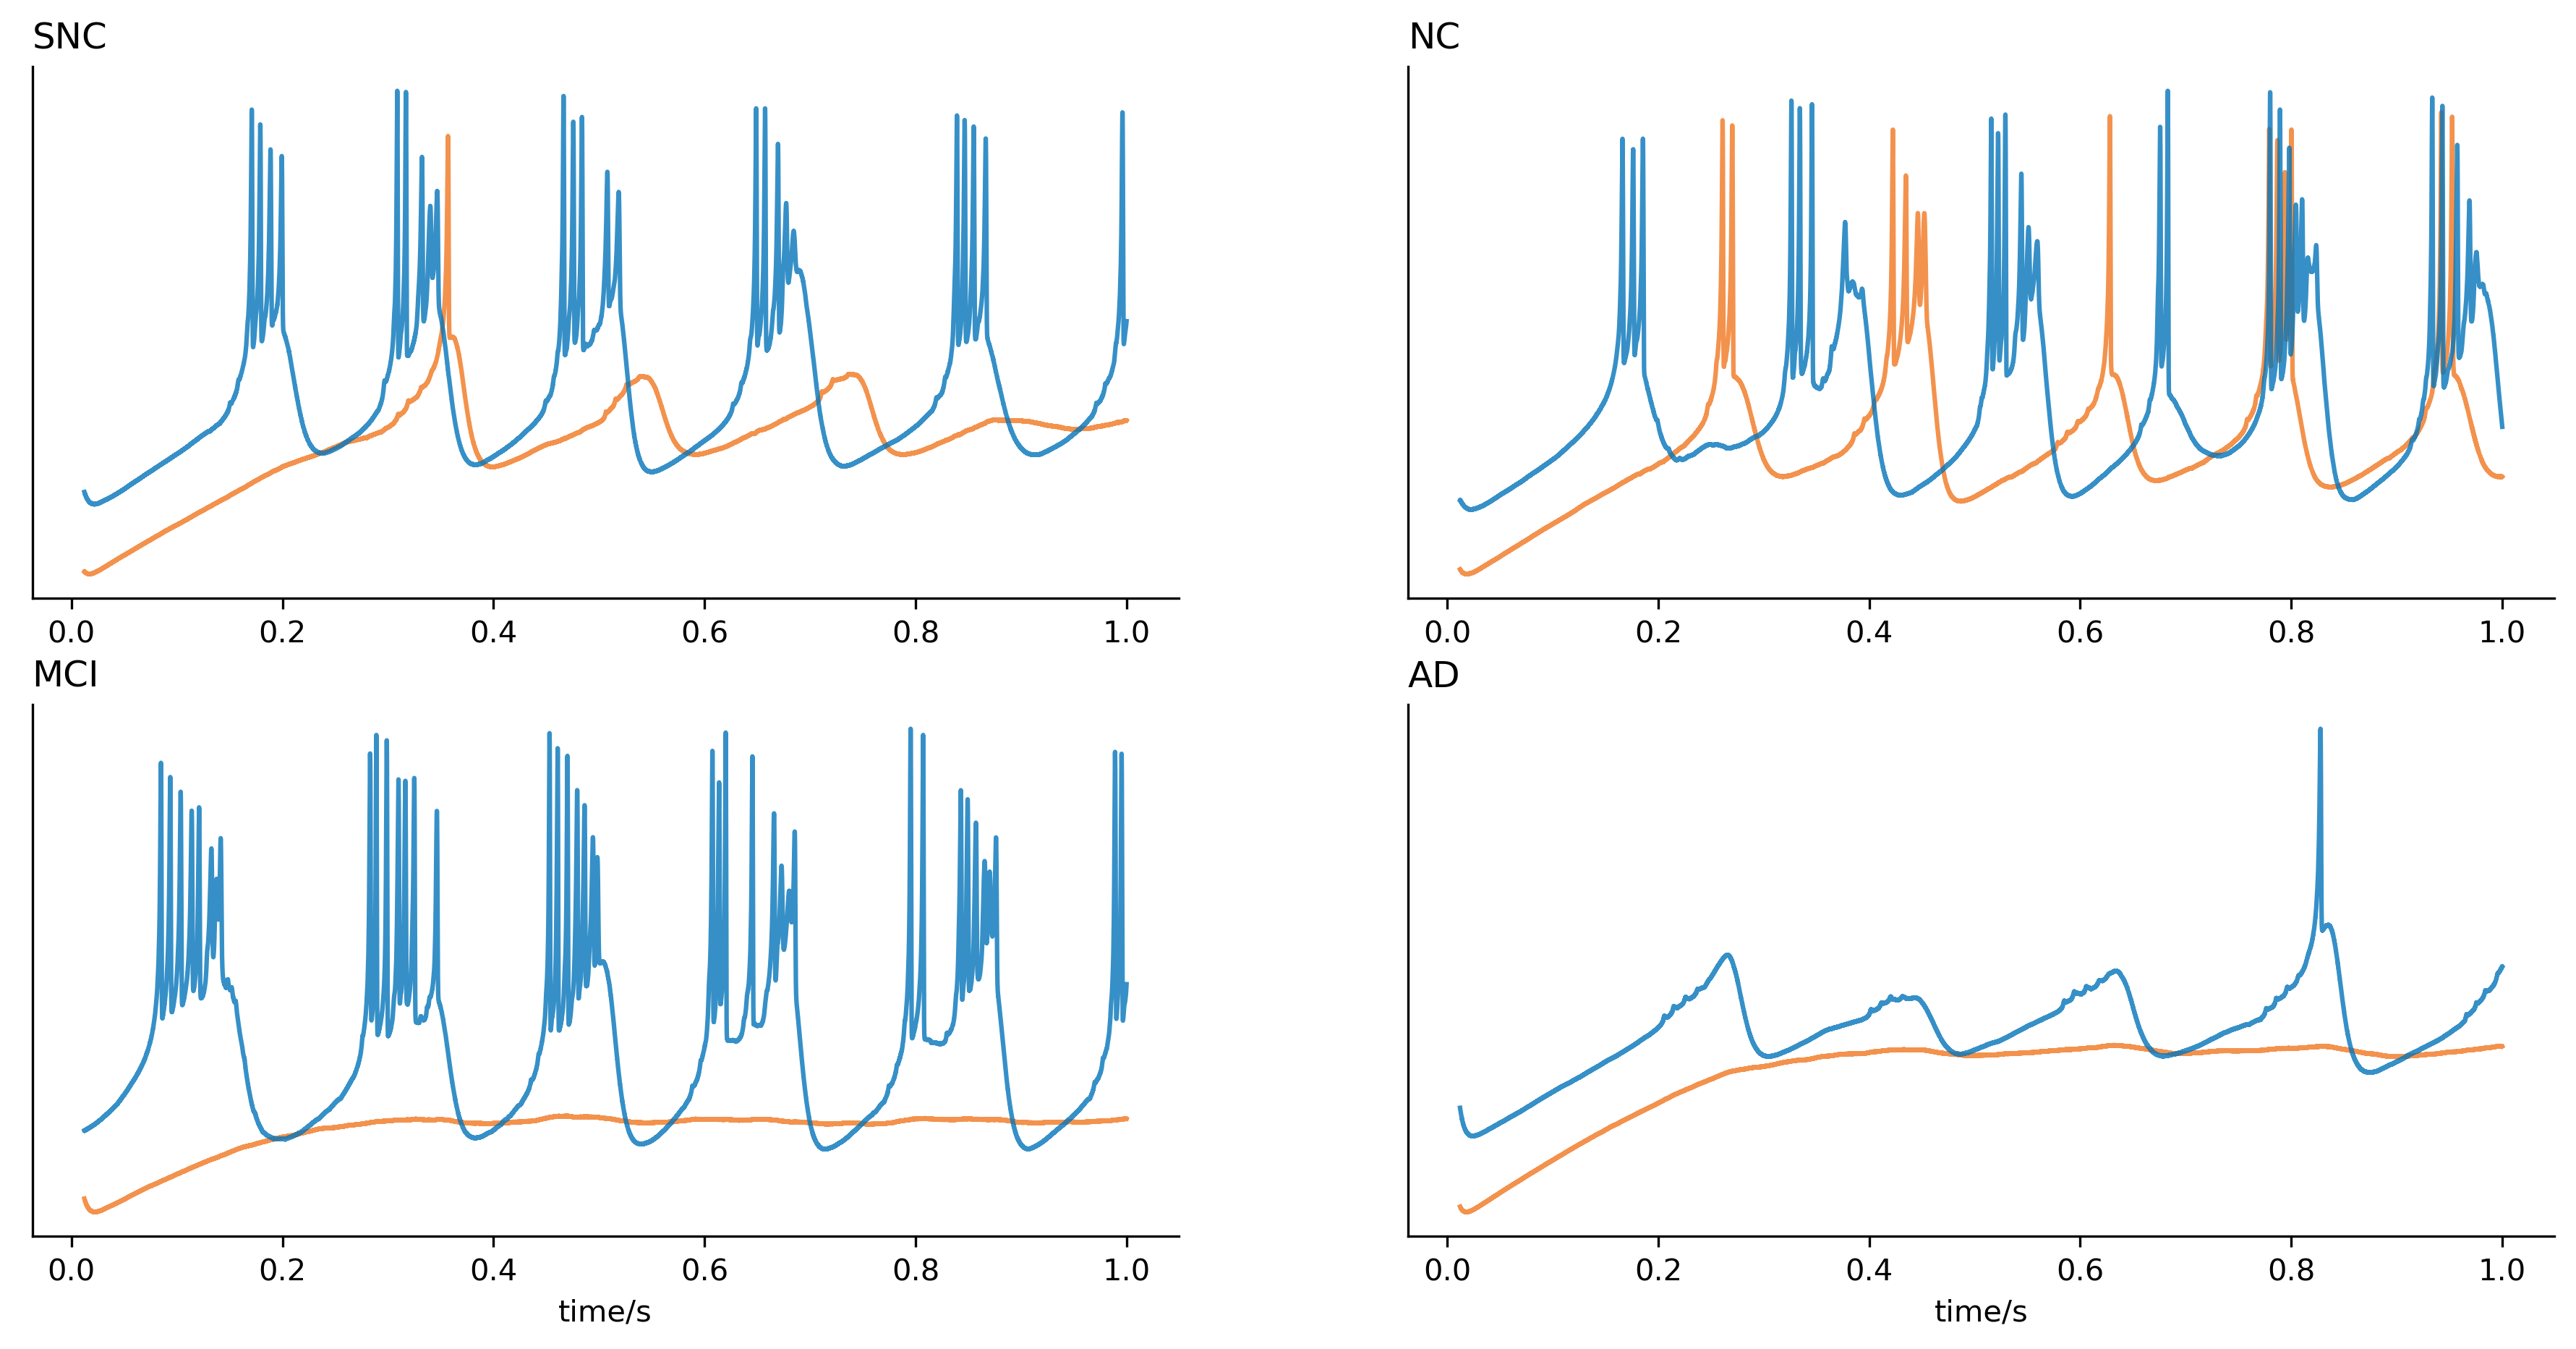

In [2]:
def fig4paper_ts(caseid, grp, key, fig):
    path = '/home/yat-lok/workspace/data4project/lateralization/tvb_parameters.xlsx'
    coData = pd.read_excel(path)
    gm = np.round(coData.loc[coData['caseid'] == caseid, 'Gc'].item(), 3)
    filename = '/home/yat-lok/workspace/data4project/lateralization/LFP_critical/'+str(grp)+'/'+str(caseid)+'_'+str(gm)+'.csv'
    # filename = '/mnt/w/gc3mins/'+grp+'/'+caseid+'.h5'
    df = pd.read_csv(filename)
    
    axes = fig.add_subplot(key)
    axes.set_title(grp, loc="left")
    axes.set_yticks([])
    #axes.spines['left'].set_visible(False)
    axes.spines['top'].set_visible(False)
    axes.spines['right'].set_visible(False)
    if grp in ["MCI","AD"]:
        axes.set_xlabel("time/s")
    #li = [4,5,0,1,2,3,6,7,8,9,10,11,12,13,14,15]
    li = [4,5]
    for i in li:
        if node_names[i] in ['pCNG-L']:
            axes.plot(np.arange(0,1,1/81920)[1000:], df.loc[:,node_names[i]][1000:], alpha=0.8, color = "#F17720")
        elif node_names[i] in ['pCNG-R']:
            axes.plot(np.arange(0,1,1/81920)[1000:], df.loc[:,node_names[i]][1000:], alpha=0.8, color = "#0474BA")
        else:
            axes.plot(np.arange(0,1,1/81920)[1000:], df.loc[:,node_names[i]][1000:], alpha=0.8)
    #plt.legend(loc="lower right")


caseids = ["4073A", "1318A", "7827A", "1477A"]
grps= ['SNC','NC','MCI','AD']
keynum = [221,222,223,224]

fig = plt.figure(figsize=(15,7), dpi=300)
for casid, grp, key in zip(caseids, grps, keynum):
    fig4paper_ts(casid, grp, key, fig)

In [3]:
# def fig4paper_ts(caseid, grp, key, fig):
#     path = '/mnt/c/Users/Wayne/tvb/stat_data/Gc_Go.xlsx'
#     coData = pd.read_excel(path)
#     gm = np.round(coData.loc[coData['caseid'] == caseid, 'Gc'].item(), 3)
#     filename = '/mnt/d/data/LFP/'+str(grp)+'/'+str(caseid)+'/'+str(caseid)+'_'+str(gm)+'.csv'
#     # filename = '/mnt/w/gc3mins/'+grp+'/'+caseid+'.h5'
#     df = pd.read_csv(filename)
    
#     axes = fig.add_subplot(key)
#     axes.set_title(f"{grp}_{caseid}")
#     for i in range(16):
#         Wn = [2,10]
#         fNQ = 81920/2
#         n=2048
#         b = signal.firwin(n, Wn, nyq=fNQ, pass_zero=False, window='hamming');
#         Vlo = signal.filtfilt(b, 1, df.loc[:,node_names[i]]);   # ... and apply it to the data.
#         # b = signal.firwin(n, Wn, nyq=fNQ, pass_zero=False, window='hamming');
#         # Vhi = signal.filtfilt(b, 1, df.loc[:,node_names[i]]);   # ... and apply it to the data.
#         Vlo = SignalToolkit.hamming_filter(data = df.loc[:,node_names[i]], n=4096)
#         Vhi = SignalToolkit.hamming_filter(data=df.loc[:,node_names[i]], Wn = [10, 60], n=4096)
#         # phi = signal.angle(signal.hilbert(Vlo))  # Compute phase of low-freq signal
#         # amp = abs(signal.hilbert(Vhi))       # Compute amplitude of high-freq signal
#         if node_names[i] in ['pCNG-L', 'pCNG-R']:
#             axes.plot(np.arange(0,1,1/81920), Vlo, label=f"theta_{node_names[i]}")
#             axes.plot(np.arange(0,1,1/81920), Vhi, label=f"gamma_{node_names[i]}")
#             axes.plot(np.arange(0,1,1/81920), df.loc[:,node_names[i]], label=node_names[i], alpha=0.5)
#         # else:
#         #     axes.plot(np.arange(0,1,1/81920),df.loc[:,node_names[i]])
#     plt.legend()


# caseids = ["4849A", "0318A", "7827A", "1477A"]
# grps= ['SNC','NC','MCI','AD']
# keynum = [221,222,223,224]

# fig = plt.figure(figsize=(15,7), dpi=300)
# for casid, grp, key in zip(caseids, grps, keynum):
#     fig4paper_ts(casid, grp, key, fig)

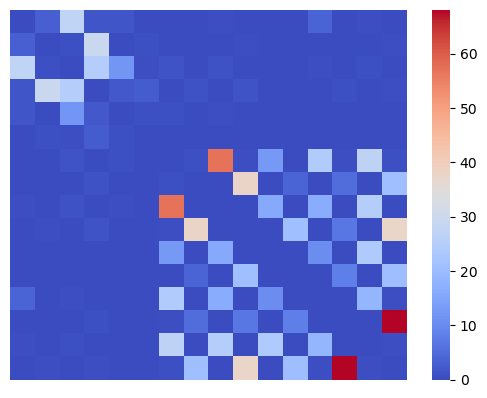

In [4]:
import seaborn as sns
import time
import os
import io
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt


# brain regions labels
regions = ['aCNG-L', 'aCNG-R','mCNG-L','mCNG-R','pCNG-L','pCNG-R', 'HIP-L','HIP-R','PHG-L','PHG-R','AMY-L','AMY-R', 'sTEMp-L','sTEMp-R','mTEMp-L','mTEMp-R']
cmap = sns.diverging_palette(230, 20, as_cmap=True)
col = ["#66CDAA","#4682B4","#AB63FA","#FFA15A"]
limbic = ['aCNG', 'mCNG', 'pCNG', 'HIP', 'PHG','AMY','sTEMp','mTEMp']
grp_pools = ['SNC', 'NC','MCI', 'AD']
start = time.time()
pdList = []
head = ['group', 'caseid']
# fig, axs = plt.subplots(2, sharex = True, sharey = True, figsize=(12,8))
# fig.suptitle("G frequency and Gamma")


tmp_head = np.concatenate((head, limbic), axis=0)
df_inter = pd.DataFrame(columns=tmp_head)
hetero_sc_data_left = pd.DataFrame(columns=tmp_head)
hetero_sc_data_right = pd.DataFrame(columns=tmp_head)
mean_group_matrix = np.zeros((16, 16, 4))
for indx, grp in enumerate(grp_pools):
# obtain the data path
    pth = "/home/yat-lok/workspace/data4project/lateralization/connectome/" + grp
    case_pools = os.listdir(pth)
    group_matrix = np.zeros((16, 16, len(case_pools)))
    for ind, caseid in enumerate(case_pools):
        ### the structural connectivity ###
        # SC lateralization
        # fig, (ax0, ax1) = plt.subplots(1,2, figsize=(15,5))
        # fig.suptitle(grp+'_'+caseid)
        # datapath = "/home/yat-lok/workspace/data4project/lateralization/connectome/" + grp + '/' + caseid + '/weights.txt'
        datapath = "/home/yat-lok/workspace/data4project/lateralization/connectome/" + grp + '/' + caseid + '/weights.txt'
        scl = open(datapath,"r")
        lines = scl.read()
        tmp_d = pd.read_csv(io.StringIO(lines), sep='\t', header=None, index_col=None, engine="python")
        tmp_df = tmp_d.set_axis(regions, axis=0) # set the index
        df_sc = tmp_df.set_axis(regions, axis=1) # set the columns
        group_matrix[:,:,ind] = df_sc

sns.heatmap(group_matrix[:,:,0], cmap="coolwarm",xticklabels=[], yticklabels=[],)
plt.show()